<a href="https://colab.research.google.com/github/Binu-Getachew/ML-Projects/blob/main/Autoencoder_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple auto encoder to start with using torch

Epoch 1/20, Loss: 0.039943
Epoch 2/20, Loss: 0.034400
Epoch 3/20, Loss: 0.039033
Epoch 4/20, Loss: 0.028410
Epoch 5/20, Loss: 0.025247
Epoch 6/20, Loss: 0.023806
Epoch 7/20, Loss: 0.025341
Epoch 8/20, Loss: 0.024206
Epoch 9/20, Loss: 0.025042
Epoch 10/20, Loss: 0.022800
Epoch 11/20, Loss: 0.024291
Epoch 12/20, Loss: 0.021575
Epoch 13/20, Loss: 0.021775
Epoch 14/20, Loss: 0.023931
Epoch 15/20, Loss: 0.027609
Epoch 16/20, Loss: 0.021791
Epoch 17/20, Loss: 0.020813
Epoch 18/20, Loss: 0.023621
Epoch 19/20, Loss: 0.024173
Epoch 20/20, Loss: 0.022059


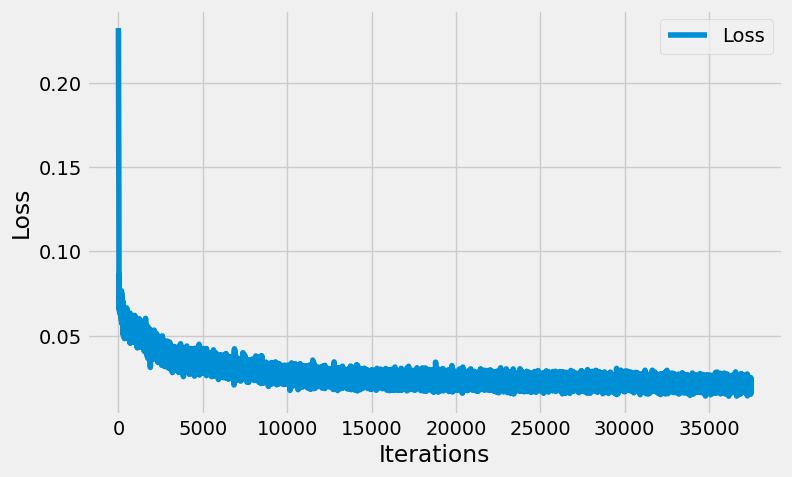

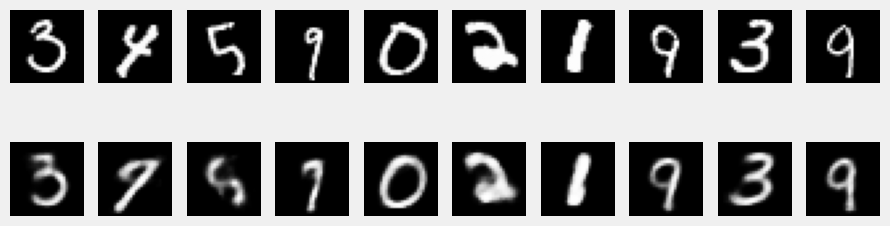

In [ ]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

tensor_transform = transforms.ToTensor()
dataset = datasets.MNIST(root="./data", train=True, download=True, transform=tensor_transform)
loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=32, shuffle=True)

class AE(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 36),
        nn.ReLU(),
        nn.Linear(36, 18),
        nn.ReLU(),
        nn.Linear(18, 9)
    )

    self.decoder = nn.Sequential(
        nn.Linear(9, 18),
        nn.ReLU(),
        nn.Linear(18, 36),
        nn.ReLU(),
        nn.Linear(36, 64),
        nn.ReLU(),
        nn.Linear(64, 128),
        nn.ReLU(),
        nn.Linear(128, 28*28),
        nn.Sigmoid()
    )

  def forward(self,x):
    x = x.view(-1, 28*28) # Flatten the input tensor
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


model= AE()
loss_function= nn.MSELoss()
optimizer= optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-8)


epochs= 20
outputs=[] # Corrected typo
losses=[]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(epochs):
  for images,_ in loader:
    images= images.view(-1,28*28).to(device)

    reconstructed= model(images)
    loss= loss_function(reconstructed, images)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

  print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.6f}")

outputs.append((epoch, images, reconstructed))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 5))
plt.plot(losses, label='Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

model.eval()
dataiter = iter(loader)
images, _ = next(dataiter)

images = images.view(-1, 28 * 28).to(device)
reconstructed = model(images)

fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(10, 3))
for i in range(10):
    axes[0, i].imshow(images[i].cpu().detach().numpy().reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(reconstructed[i].cpu().detach().numpy().reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')
plt.show()